In [0]:
!pip install aguaclara
!pip install molmass

In [0]:
import aguaclara as ac
import molmass as mm
from aguaclara.core.units import unit_registry as u
import numpy as np
import matplotlib.pyplot as plt

127 kilogram / day


In [0]:

CNP = mm.Formula(' Al[OH]3')  # Coagulant nanoparticle precipitate
print(CNP.formula)  # hill notation
print(CNP.empirical)
print(CNP.mass)  # average mass
print(CNP.isotope.massnumber)  # nominal mass
print(CNP.isotope.mass)  # monoisotopic mass
print(CNP.atoms)
print(CNP.composition())
CNP.composition()[0][3]


AlH3O3
AlH3O3
78.003558
78
77.98975740259999
7
Element  Number  Relative mass  Fraction %
Al            1      26.981538     34.5901
H             3       3.023820      3.8765
O             3      47.998200     61.5333
Total:        7      78.003558    100.0000


0.345901375421875

# 3 Flocculation stages


1.   Coagulant nanoparticles partially cover clay: core particle is clay with partial coverage by nanoparticles up to 50% coverage
     
     a. core particle is clay coated with some coagulant nanoparticles

     b. density must account for clay, coagulant nanoparticles, and water

1.   Coagulant nanoparticles flocculate to same size as clay and then combine with clay (same size particles can collide): 
    
     a. core particle is part of a clay particle and part of a coagulant aggregate that is then coated with some coagulant nanoparticles
     



# Solution steps

Can we bring humic acid into this model?

1.  Find the coagulant dose that corresponds to 50% coverage of clay.
1.  Excess coagulant (above 50% clay coverage) produces coagulant fractals with the same diameter as clay.
1.  Find density of a coagulant fractal that is the size of clay.
1.  The average core particle has a weighted density of clay and coagulant fractal based on the number concentrations of those two types of particles
 

# Floc Density Including Coagulant contribution



## Clay Dimensions

$$V_{Clay} = \frac{\pi}{4} H_{cyl} D_{cyl}^2 = \frac{\pi}{6} D_{Clay}^3 $$

$$\Pi_D^H = \frac{H_{cyl}}{D_{cyl}}$$

Eliminate the height of the cylinder by substituting the ratio of height to diameter.

$$\frac{\pi}{4} \Pi_D^H D_{cyl}^3 = \frac{\pi}{6} D_{Clay}^3 $$

Now solve for the diameter of the cylinder as a function of the diameter of the sphere.

$$  D_{cyl} = \left(\frac{2}{3\Pi_D^H}\right)^\frac{1}{3} D_{Clay} $$

## Clay - CNP core properties

The clay particle has CNP attached that increase the Clay-CNP core dimensions and reduce the density of the resulting core particle. First need to find the number of CNP per clay.

$$n_{CNP} = \frac{C_{CNP}}{\rlap{--} V_{CNP} \rho_{CNP}} = \frac{6}{\pi D_{CNP}^3} \frac{C_{CNP}}{\rho_{CNP}}$$

$$n_{Clay} = \frac{C_{Clay}}{\rlap{--} V_{Clay} \rho_{CClayNP}} = \frac{6}{\pi D_{Clay}^3} \frac{C_{Clay}}{\rho_{Clay}}$$

$$n^{CNP}_{Clay} = \frac{n_{CNP}}{n_{Clay}} = \frac{D_{Clay}^3}{D_{CNP}^3} \frac{C_{CNP}}{\rho_{CNP}}   \frac{\rho_{Clay}}{C_{Clay}}$$

Find the density of the resulting clay-CNP core particle. This core particle is a clay particle with partial coverage of CNP

$$M_{core} = M_{clay} + n^{CNP}_{Clay}M_{CNP}$$

$$\rlap{-} V_{core}  = \frac{\pi}{4}\left(D_{cyl} + 2D_{CNP}\right)^2 \left( \Pi_D^H D_{cyl} + 2D_{CNP}\right)  $$

$$\rho_{core} = \frac{M_{core}}{\rlap{-} V_{core}}$$

## 50% coverage

Need to find the CNP/Clay concentration ratio that results in 50% coverage of the clay by the CNP. Begin by finding the $n^{CNP}_{Clay_{0.5}}$ that gives 50% surface area coverage. The area that matters is the area that is $\frac{1}{2}D_{CNP}$ away from the clay surface.

$$ A_{core}  = \frac{\pi}{2}\left(D_{cyl} + D_{CNP}\right)^2 + \pi\left(D_{cyl} + D_{CNP}\right)\left( \Pi_D^H D_{cyl} + D_{CNP}\right)  $$



$$n^{CNP}_{Clay_{0.5}} = \frac{0.5 A_{core}}{\pi D_{CNP}^2}$$

$$C_{CNP_{0.5}}=n^{CNP}_{Clay_{0.5}} C_{Clay} \frac{D_{CNP}^3}{D_{Clay}^3} \frac{\rho_{CNP}}{\rho_{Clay}} $$

## High CNP concentrations (above 50% coverage potential)

* subract 50% coverage by CNP concentration from total concentration of CNP
* find the density of a clay sized CNP floc
* find the mass of CNP in a clay sized CNP floc
* find the number of clay sized CNP floc per liter
* divide the number of clay sized CNP floc per liter by the number of clay particles per liter
* build a floc out of clay and clay sized CNP flocs.
* The density of the core particle is the number weighted average 



# below is questionable

I think this model wil result in a clay surface coverage, $\Gamma$, of 0.5 for all high coagulant dosages. It seems likely that there is another 2nd order effect that results in the surface coverage continuing to increase slowly as the coagulant dose increases.

Now we want to estimate the density of these flocs. This first step is to calculate the density of the coagulant nanoparticle aggregate.


$$\rho_{CNPA}  = \left( \rho_{CNP} - \rho_{H_2O} \right) \left( \frac{d_{CNP}}{d_{CNPA}} \right)^{3 - D_{Fractal}} + \rho_{H_2O} $$



Next step, define the core particle that is a combination of the coagulant nanoparticles and the clay. The core particles increases in all dimensions by 2 of the coagulant nanoparticle aggregate diameters.

We need the density of this new larger core particle. We calculate the density of the core particle by tracking mass and volume of the clay, nanoparticle aggregates, and water that make up this core. We count the new dimension of the core to be equal to the original dimension of the clay particle + the diameter of the nanoparticle aggregates. This is a big uncertainty. Perhaps we should be adding 2 diameters of the nanoparticle aggregates.

$$\rho_{Floc} - \rho_{H_2O} = \left( \rho_{Floc_0} - \rho_{H_2O} \right) \left( \frac{d_0}{d} \right)^{3 - D_{Fractal}}$$

Terminal velocity of a sphere is

$$v_t = \frac{D^2 g}{18 \nu_{H_2O}} \frac{\rho_{Floc} - \rho_{H_2O}}{\rho_{H_2O}}$$


In [0]:
def Sphere_C_d(Re):
  """ This calculates the coefficient of drag of a sphere based on 
  equation 10-14 in the MWH textbook.
  """
  a = 1 + 0.150*Re**0.681
  b = 0.407/(1 + 8710/Re)
  return 24/Re * a + b

def v_t_sphere_laminar(D,density,temp):
  """ Terminal velocity of a sphere for low Reynolds number where it 
  follows Stokes Law."""
  nu = ac.viscosity_kinematic_water(temp)
  return (D**2 * u.gravity/(18 * nu) * (density - ac.density_water(temp))/ac.density_water(temp)).to(u.mm/u.s)

def v_t_sphere_C_d(D,density,temp, C_d):
  """ Terminal velocity as a function of the coefficient of drag. This is a helper 
  function that will be used to determine the actual terminal velocity of a sphere"""
  return (np.sqrt((D*4 * u.gravity * (density - ac.density_water(temp))/(3 * C_d* ac.density_water(temp))).to(u.m**2/u.s**2))).to(u.mm/u.s)  

def v_t_sphere(D,density,temp):
  """Use iteration to quickly converge on the correct velocity. The while loop
  continues until the error between the two most recent calculations is small."""
  nu = ac.viscosity_kinematic_water(temp)
  #Initial estimate based on Stokes Law
  v_t_0 = v_t_sphere_laminar(D,density,temp)
  #Initialize error to be large
  error = 1
  i=0
  while error>0.00001:
    Re = v_t_0 * D/nu
    C_d = Sphere_C_d(Re)
    v_t_1 = v_t_sphere_C_d(D,density,temp, C_d)
    error = np.absolute(v_t_1 - v_t_0)/v_t_1
    #Now move the newest estimate into the previous spot
    v_t_0 = v_t_1
    i=i+1
  #print(i)
  return v_t_1

def Floc_v_t(D0,D,D_Fractal,density,temp):
  phi = 45/24
  return v_t_sphere(D0,density,temp)/phi * ((D/D0).to(u.dimensionless))**(D_Fractal - 1)

In [0]:
def Floc_rho(Core_rho, Core_D, Floc_D, D_Fractal, temp):
  return ((Core_rho - ac.density_water(temp))*(Core_D/Floc_D)**(3-D_Fractal) + ac.density_water(temp)).to(u.kg/u.m**3)

def Terminal_V(Floc_D, Floc_rho, temp):
  return (Floc_D**2 * u.gravity/(18 * ac.viscosity_kinematic(temp)) * (Floc_rho - ac.density_water(temp))/ac.density_water(temp)).to(u.mm/u.s)



class SweepFlocModel():
 """Model the floc density of flocs created using high concentrations of coagulant

 Design Inputs:
   - ``q (float * u.L/u.s)``: Flow rate (required)
   - ``temp (float * u.degC)``: Water temperature (optional, defaults to
     20°C)
    """

 def __init__(self, temp=20*u.degC, Clay_C=100 * u.NTU,CNP_Al_C=20 * u.mg/u.L, Clay_D=5 * u.um, Clay_H_D=0.1, CNP_D=90 * u.nm, CNP_rho=2000 * u.kg/u.m**3, D_Fractal=2.3, Floc_D=1*u.mm, **kwargs):
   
   self.temp=temp
   self.Clay_C=Clay_C
   self.Clay_rho=2650*u.kg/u.m**3
   self.CNP_Al_C=CNP_Al_C #aluminum concentration where CNP is coagulant nanoparticles
   self.Clay_D=Clay_D
   self.Clay_H_D=Clay_H_D
   self.CNP_D=CNP_D
   self.CNP_rho=CNP_rho  # don't know how to estimate this density
   self.D_Fractal=D_Fractal
   self.Floc_D=Floc_D

   self.calculate_outputs()


    
 def calculate_outputs(self):
   self.CNP = mm.Formula(' Al[OH]3')  # Coagulant nanoparticle precipitate
   self.Clay_D_cyl = (2/(3*self.Clay_H_D))**(1/3) * self.Clay_D
   self.Clay_H_cyl = self.Clay_H_D * self.Clay_D_cyl
   self.Clay_n = ((self.Clay_C/self.Clay_rho) / ((np.pi * self.Clay_D ** 3) / 6)).to(1/u.L)
   self.Clay_V = np.pi/6 * self.Clay_D**3
   self.Clay_A = (self.Clay_n * ac.ratio_clay_sphere(self.Clay_H_D) * np.pi * self.Clay_D**2).to(u.cm**2/u.L)
   self.CNP_C = self.CNP_Al_C/self.CNP.composition()[0][3] #Al(OH)3 concentration
   self.CNP_n = ((self.CNP_C/self.CNP_rho) / ((np.pi * self.CNP_D ** 3) / 6)).to(1/u.L) # nanoparticles per liter
   self.CNPA_D = (ac.max((self.Clay_A/(np.pi * self.CNP_n * self.CNP_D**self.D_Fractal))**(1/(2-self.D_Fractal)),self.CNP_D)).to(u.nm)
   self.CNPA_rho = (self.CNP_rho - ac.density_water(self.temp)) * (self.CNP_D/self.CNPA_D)**(3-self.D_Fractal) + ac.density_water(self.temp)
   self.CNPA_n = self.CNP_n * (self.CNP_D/self.CNPA_D)**self.D_Fractal # nanoparticle aggregates per liter
   self.CNPA_per_Clay = self.CNPA_n/self.Clay_n # number of CNPA per clay particles
   self.Core_CNPA_V = self.CNPA_per_Clay * np.pi/6 * self.CNPA_D**3
   self.Core_CNPA_M = self.Core_CNPA_V * self.CNPA_rho
   self.Core_Clay_M = self.Clay_V * self.Clay_rho
   self.Core_D_cyl = self.Clay_D_cyl + self.CNPA_D
   self.Core_H_cyl = self.Clay_H_cyl + self.CNPA_D
   self.Core_V = np.pi/4 * self.Core_D_cyl**2 * self.Core_H_cyl
   self.Core_D = (6 * self.Core_V/np.pi)**(1/3) # equivalent spherical diameter
   self.Core_Water_V = self.Core_V - self.Core_CNPA_V - self.Clay_V
   self.Core_Water_M = self.Core_Water_V * ac.density_water(self.temp)
   self.Core_M = self.Core_Clay_M + self.Core_CNPA_M + self.Core_Water_M
   self.Core_rho = self.Core_M/self.Core_V # density of the clay, coagulant aggregate, and water core particle that will aggregate to form a floc
   self.Floc_rho = Floc_rho(self.Core_rho, self.Core_D, self.Floc_D, self.D_Fractal, self.temp)
   self.Floc_buoyant_rho = self.Floc_rho - ac.density_water(self.temp)
   self.Floc_terminal_V = Terminal_V(self.Floc_D, self.Floc_rho, self.temp)

In [0]:
def plotflocproperty(Clay_C,D_Fractal,property_name):
  m = 50
  n = 3
  CNP_Al_C_graph = np.logspace(np.log10(0.1),np.log10(100),m) * u.mg/u.L
  Floc_D_graph = np.logspace(np.log10(10), np.log10(1000), n) * u.um
  Sweeps =np.empty((m,n), dtype=type(Sweep))
  for i in range(m):
    for j in range(n):
      Sweeps[i,j] = SweepFlocModel(CNP_Al_C=CNP_Al_C_graph[i],Floc_D=Floc_D_graph[j],Clay_C=Clay_C,D_Fractal=D_Fractal)

  myunits = (getattr(Sweeps[0,0],property_name)).units
  myproperty_array = np.empty((m,n)) * myunits

  for i in range(m):
    for j in range(n):
      myproperty_array[i,j] = getattr(Sweeps[i,j],property_name)
  
  for i in range(n):
    plt.plot(CNP_Al_C_graph, myproperty_array[0:,i]  ,'-');
  
  plt.xlabel(r'Coagulant concentration  as Al$(\frac{mg}{L})$');
  plt.ylabel(property_name + ' ' + str(myunits));
  plt.xscale('log')
  plt.yscale('log')
  plt.legend(Floc_D_graph)
  plt.show()
  print(property_name, ' as a function of coagulant dose for a',Clay_C, 'kaolin clay suspension with a fractal dimension of',D_Fractal)


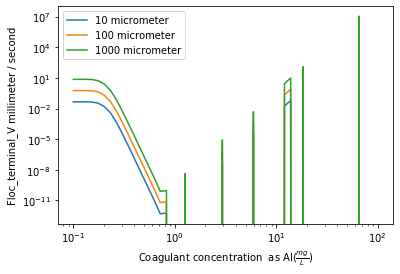

Floc_terminal_V  as a function of coagulant dose for a 10 NTU kaolin clay suspension with a fractal dimension of 2.1


/usr/local/lib/python3.6/dist-packages/pint/quantity.py:780: RuntimeWarning: invalid value encountered in multiply
  magnitude = magnitude_op(self._magnitude, other_magnitude)


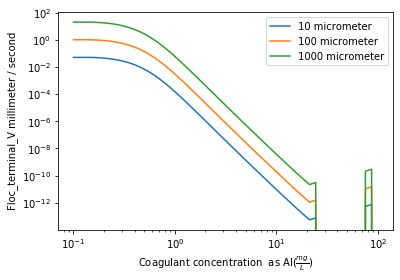

Floc_terminal_V  as a function of coagulant dose for a 10 NTU kaolin clay suspension with a fractal dimension of 2.3


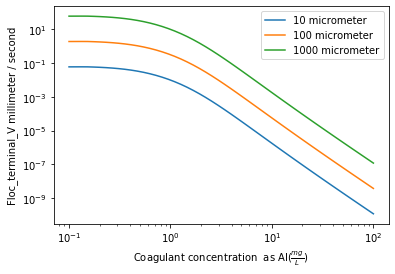

Floc_terminal_V  as a function of coagulant dose for a 10 NTU kaolin clay suspension with a fractal dimension of 2.5


<Unit('millimeter / second')>

In [0]:
plotflocproperty(10*u.NTU, 2.1,'Floc_terminal_V')
plotflocproperty(10*u.NTU, 2.3,'Floc_terminal_V')
plotflocproperty(10*u.NTU, 2.5,'Floc_terminal_V')

Assumptions


*   aggregation of coagulant nanoparticles is favorable
*   List item



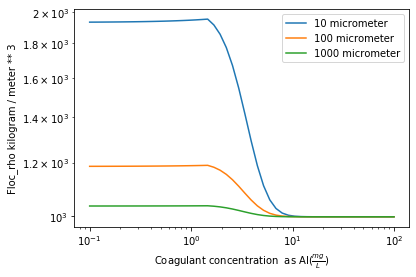

Floc_rho  as a function of coagulant dose for a 100 NTU kaolin clay suspension with a fractal dimension of 2.3


<Unit('kilogram / meter ** 3')>

In [0]:
plotflocproperty(100*u.NTU,2.3,'Floc_rho')

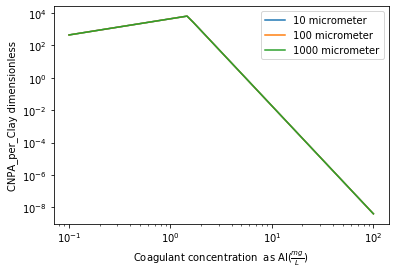

CNPA_per_Clay  as a function of coagulant dose for a 100 NTU kaolin clay suspension with a fractal dimension of 2.3


<Unit('dimensionless')>

In [0]:
plotflocproperty(100*u.NTU,2.3,'CNPA_per_Clay')

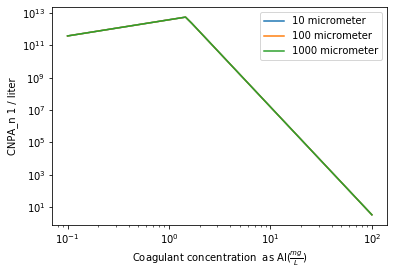

CNPA_n  as a function of coagulant dose for a 100 NTU kaolin clay suspension with a fractal dimension of 2.3


<Unit('1 / liter')>

In [0]:
plotflocproperty(100*u.NTU,2.3,'CNPA_n')

# Appendix of bad ideas

This was my first modeling attempt. I no longer think this next assumption is valid. 

The diameter of the coagulant nanoparticle aggregates (CNPA) is such that the surface area of the CNPA is equal to the surface area of the clay. This is because the CNPA-Clay collisions become more favorable once the surface area of the clay exceeds the surface area of the CNPA.

$$d_{CNPA} = d_{CNP} n_{AggCNP}^\frac{1}{D_{Fractal}}$$

where $n_{AggCNP}$ is the number of CNP per CNP aggregate that has grown to the full size set by the area ratio constraint.

Solving for $n_{AggCNP}$ we obtain

$$ n_{AggCNP} = \left(\frac{d_{CNPA}}{d_{CNP}}\right)^{D_{Fractal}} $$

The number of CNPA is equal to the total number of CNP divided by the number of CNP per CNP aggregate.

$$n_{CNPA} = \frac{n_{CNP}}{n_{AggCNP}} $$

Combine the previous two equations to eliminate the unknown number of aggregates, ${n_{AggCNP}}$

$$n_{CNPA} = n_{CNP} \left(\frac{d_{CNP}}{d_{CNPA}}\right)^{D_{Fractal}} $$

The total surface area of the CNPA is

$$ A_{Clay} = A_{CNPA} = n_{CNPA} \pi d_{CNPA}^2 $$

Combine the previous two equations to eliminate the number of aggregates, $n_{CNPA}$.

$$ A_{Clay} = A_{CNPA} =  n_{CNP} \left(\frac{d_{CNP}}{d_{CNPA}}\right)^{D_{Fractal}} \pi d_{CNPA}^2 $$

Now solve for the diameter of the aggregates.

$$ A_{Clay} =  n_{CNP} d_{CNP}^{D_{Fractal}} \pi d_{CNPA}^\left({2-{D_{Fractal}}}\right) $$


$$ d_{CNPA} = \left(\frac{A_{Clay}}{ \pi n_{CNP}d_{CNP}^{D_{Fractal}}}\right)^{\frac{1}{2-{D_{Fractal}}}} $$